In [21]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np
import os
import pandas as pd 
import seaborn as sns
import itertools

In [22]:
folder_path = 'script_csv'
movies = []
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        movies.append(os.path.join(folder_path, filename))

In [23]:
print(movies)

['script_csv\\age_of_ultron.csv', 'script_csv\\ant_man.csv', 'script_csv\\avengers.csv', 'script_csv\\avengers_endgame.csv', 'script_csv\\black_panther.csv', 'script_csv\\captain_america.csv', 'script_csv\\civil_war.csv', 'script_csv\\infinity_war.csv', 'script_csv\\iron_man.csv', 'script_csv\\iron_man_2.csv', 'script_csv\\iron_man_3.csv', 'script_csv\\ragnarok.csv', 'script_csv\\thor.csv', 'script_csv\\thor_dark_world.csv', 'script_csv\\winter_soldier.csv']


In [24]:
character_gender_mapping = {}
for movie in movies:
    df = pd.read_csv(movie)
    for index, row in df.iterrows():
        character_gender_mapping[row['character']] = row['gender']

In [25]:
character_gender_mapping    

{'ANNOUNCER': 'MALE',
 'TONY STARK': 'MALE',
 'STEVE ROGERS': 'MALE',
 'JARVIS': 'MALE',
 'THOR': 'MALE',
 'NATASHA ROMANOFF': 'FEMALE',
 'CLINT BARTON': 'MALE',
 'STRUCKER': 'MALE',
 'FORTRESS SOLDIER': 'MALE',
 'DR. LIST': 'MALE',
 'IRON LEGION': 'MALE',
 'SOLDIERS': 'MALE',
 'PIETRO MAXIMOFF': 'MALE',
 'BRUCE BANNER': 'MALE',
 'MARIA HILL': 'FEMALE',
 'DR. HELEN CHO': 'FEMALE',
 'ULTRON': 'MALE',
 'JAMES RHODES': 'MALE',
 'SAM WILSON': 'MALE',
 'PARTY GUEST': 'NEUTRAL',
 'STAN LEE': 'MALE',
 'WANDA MAXIMOFF': 'FEMALE',
 'ULYSSES KLAUE': 'MALE',
 "KLAUE'S MERCENARY": 'MALE',
 'BALLET INSTRUCTOR': 'FEMALE',
 'MADAME B': 'FEMALE',
 'PEGGY CARTER': 'FEMALE',
 'HEIMDALL': 'MALE',
 'LAURA BARTON': 'FEMALE',
 "BARTON'S DAUGHTER": 'FEMALE',
 'LILA BARTON': 'FEMALE',
 'NICK FURY': 'MALE',
 'ERIK SELVIG': 'MALE',
 'WORLD HUB TECH': 'MALE',
 'VISION': 'MALE',
 'FRIDAY': 'MALE',
 'SPECIALIST CAMERON KLEIN': 'MALE',
 'ZRINKA': 'FEMALE',
 'THANOS': 'MALE',
 'DR. HANK PYM': 'MALE',
 'MITCHELL CARS

#### Gender Distribution

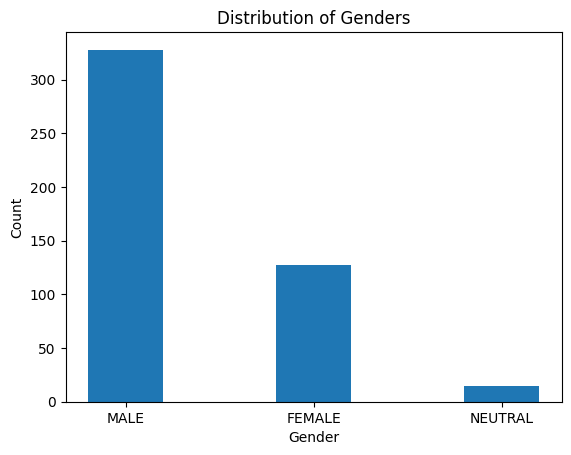

In [26]:
gender_counts = {}
for character in character_gender_mapping: 
    if character_gender_mapping[character] not in gender_counts:
        gender_counts[character_gender_mapping[character]] = 1
    else:
        gender_counts[character_gender_mapping[character]] += 1

plt.bar(gender_counts.keys(), gender_counts.values(), width=0.4)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders')
plt.show()

#### Dialogue Gender Distribution Analysis

In [27]:
character_gender_mapping

{'ANNOUNCER': 'MALE',
 'TONY STARK': 'MALE',
 'STEVE ROGERS': 'MALE',
 'JARVIS': 'MALE',
 'THOR': 'MALE',
 'NATASHA ROMANOFF': 'FEMALE',
 'CLINT BARTON': 'MALE',
 'STRUCKER': 'MALE',
 'FORTRESS SOLDIER': 'MALE',
 'DR. LIST': 'MALE',
 'IRON LEGION': 'MALE',
 'SOLDIERS': 'MALE',
 'PIETRO MAXIMOFF': 'MALE',
 'BRUCE BANNER': 'MALE',
 'MARIA HILL': 'FEMALE',
 'DR. HELEN CHO': 'FEMALE',
 'ULTRON': 'MALE',
 'JAMES RHODES': 'MALE',
 'SAM WILSON': 'MALE',
 'PARTY GUEST': 'NEUTRAL',
 'STAN LEE': 'MALE',
 'WANDA MAXIMOFF': 'FEMALE',
 'ULYSSES KLAUE': 'MALE',
 "KLAUE'S MERCENARY": 'MALE',
 'BALLET INSTRUCTOR': 'FEMALE',
 'MADAME B': 'FEMALE',
 'PEGGY CARTER': 'FEMALE',
 'HEIMDALL': 'MALE',
 'LAURA BARTON': 'FEMALE',
 "BARTON'S DAUGHTER": 'FEMALE',
 'LILA BARTON': 'FEMALE',
 'NICK FURY': 'MALE',
 'ERIK SELVIG': 'MALE',
 'WORLD HUB TECH': 'MALE',
 'VISION': 'MALE',
 'FRIDAY': 'MALE',
 'SPECIALIST CAMERON KLEIN': 'MALE',
 'ZRINKA': 'FEMALE',
 'THANOS': 'MALE',
 'DR. HANK PYM': 'MALE',
 'MITCHELL CARS

In [28]:
dialogue_length = {'MALE': 0, 'FEMALE': 0, 'NEUTRAL': 0}  # Initialize the dictionary with genders
for movie in movies: 
    df = pd.read_csv(movie)
    for index, row in df.iterrows():
        if row['character'] in character_gender_mapping:  # Check if character is in the mapping
            dialogue_length[character_gender_mapping[row['character']]] += len(row['line'].split(' '))

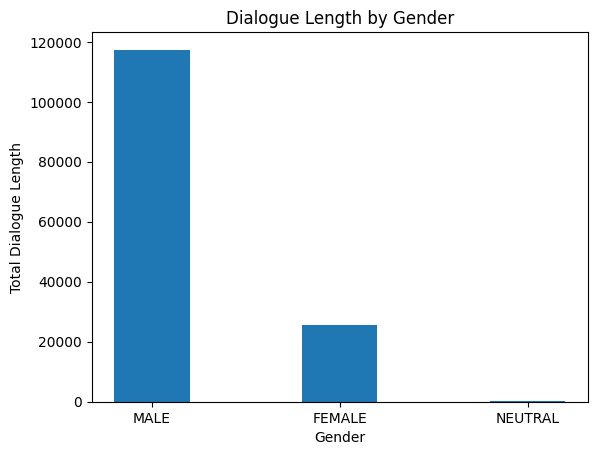

In [29]:
plt.bar(dialogue_length.keys(), dialogue_length.values(), width=0.4)
plt.xlabel('Gender')
plt.ylabel('Total Dialogue Length')
plt.title('Dialogue Length by Gender')
plt.show()

#### Average Dialogue Length per Gender Analysis

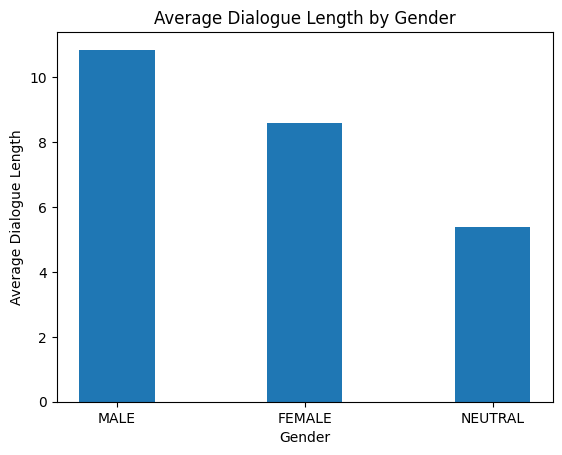

In [30]:
dialogue_length_avg = {'MALE': [], 'FEMALE': [], 'NEUTRAL': []}  # Initialize the dictionary with genders
for movie in movies: 
    df = pd.read_csv(movie)
    for index, row in df.iterrows():
        if row['character'] in character_gender_mapping:  # Check if character is in the mapping
            dialogue_length_avg[character_gender_mapping[row['character']]].append(len(row['line'].split(' ')))

avg_lens = {k: sum(v) / len(v) for k, v in dialogue_length_avg.items()}
plt.bar(avg_lens.keys(), avg_lens.values(), width=0.4)
plt.xlabel('Gender')
plt.ylabel('Average Dialogue Length')
plt.title('Average Dialogue Length by Gender')
plt.show()

#### Percentage of Dialogues per Gender as a Trend per Movie

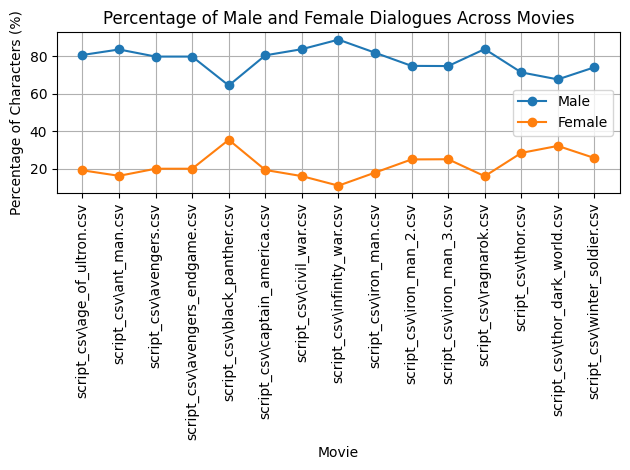

In [34]:
male_counts = []
female_counts = []
for movie in os.listdir('./script_csv'):
    if not movie.endswith('.csv'):
        continue
    df = pd.read_csv(os.path.join('./script_csv', movie))
    male_count = 0
    female_count = 0
    for index, row in df.iterrows():
        if row['character'] in character_gender_mapping:
            gender = character_gender_mapping[row['character']]
            if gender == 'MALE':
                male_count += 1
            elif gender == 'FEMALE':
                female_count += 1
    total_characters = male_count + female_count
    male_percentage = (male_count / total_characters) * 100
    female_percentage = (female_count / total_characters) * 100
    male_counts.append(male_percentage)
    female_counts.append(female_percentage)
plt.plot(movies, male_counts, marker='o', label='Male')
plt.plot(movies, female_counts, marker='o', label='Female')
plt.xlabel('Movie')
plt.ylabel('Percentage of Characters (%)')
plt.title('Percentage of Male and Female Dialogues Across Movies')
plt.legend()
plt.xticks(rotation=90)  
plt.grid(True)
plt.tight_layout()
plt.show()

#### Gender Pair Mapping for Conversation Analysis


In [42]:
# Initialize empty dictionary to store gender pair interactions
gender_pair_counts = {}
# Iterate through the movies in the directory
for movie in os.listdir('./script_csv'):
    if not movie.endswith('.csv'):
        continue
    # Read the CSV file for the current movie
    df = pd.read_csv(os.path.join('./script_csv', movie))
    # Extract dialogue interactions between different genders
    genders_in_scene = df['character'].map(character_gender_mapping)
    gender_pairs_in_scene = itertools.combinations(genders_in_scene, 2)
    # Count occurrences of each gender pair
    for pair in gender_pairs_in_scene:
        if pair not in gender_pair_counts:
            gender_pair_counts[pair] = 1
        else:
            gender_pair_counts[pair] += 1


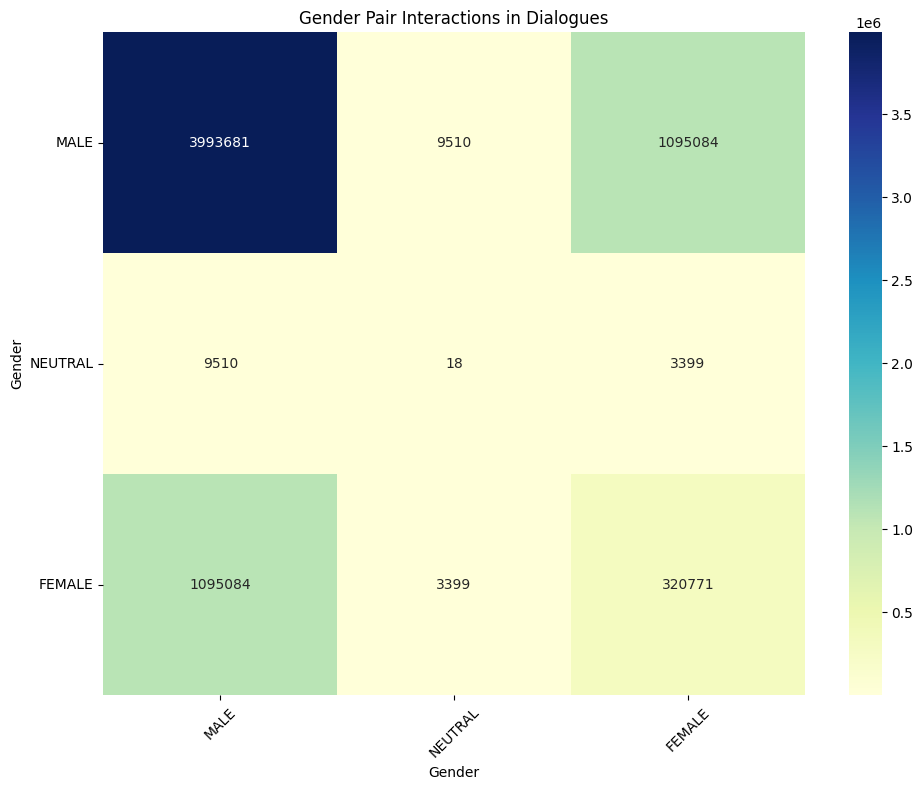

In [46]:
# Convert gender pair counts to a matrix
unique_genders = list(set(gender for pair in gender_pair_counts.keys() for gender in pair))
co_occurrence_matrix = pd.DataFrame(0, index=unique_genders, columns=unique_genders)
for pair, count in gender_pair_counts.items():
    co_occurrence_matrix.loc[pair[0], pair[1]] = count
    co_occurrence_matrix.loc[pair[1], pair[0]] = count  # Make the matrix symmetric
# Plot heatmap of co-occurrence matrix
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Gender Pair Interactions in Dialogues')
plt.xlabel('Gender')
plt.ylabel('Gender')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Normalized Gender Pair Mapping for Conversation Analysis

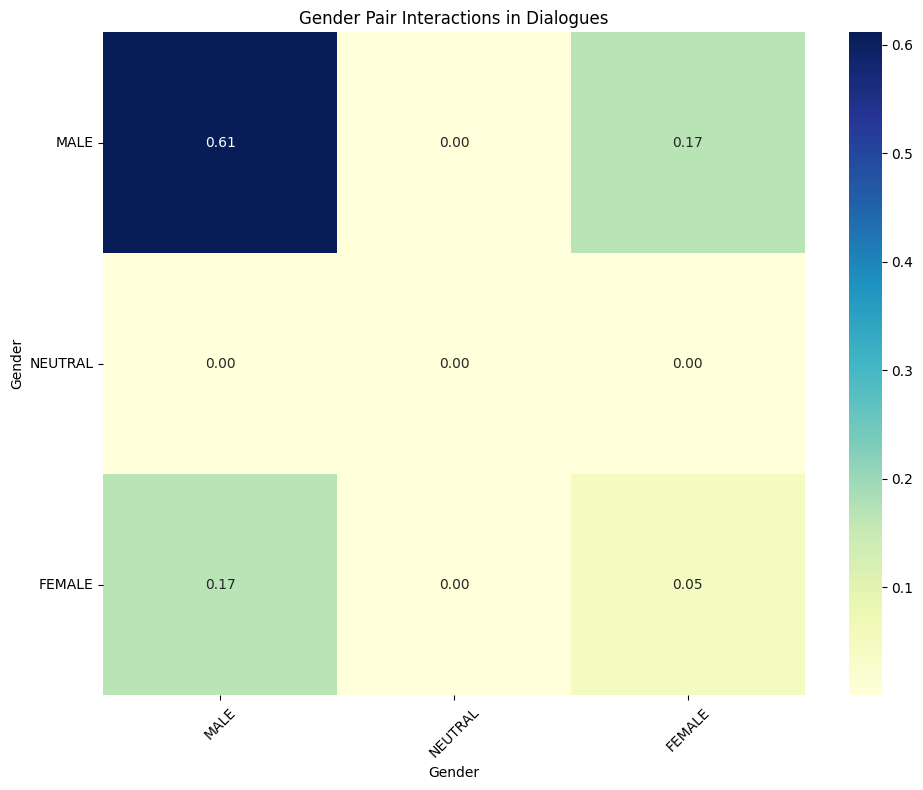

In [47]:
# Convert gender pair counts to a matrix
unique_genders = list(set(gender for pair in gender_pair_counts.keys() for gender in pair))
co_occurrence_matrix = pd.DataFrame(0, index=unique_genders, columns=unique_genders)
for pair, count in gender_pair_counts.items():
    co_occurrence_matrix.loc[pair[0], pair[1]] = count
    co_occurrence_matrix.loc[pair[1], pair[0]] = count  # Make the matrix symmetric
# Normalize the co-occurrence matrix
co_occurrence_matrix = co_occurrence_matrix.div(co_occurrence_matrix.sum().sum())
# Plot heatmap of co-occurrence matrix
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Gender Pair Interactions in Dialogues')
plt.xlabel('Gender')
plt.ylabel('Gender')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Word Cloud for Males and Females Distribution

In [11]:
!pip install -q wordcloud

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

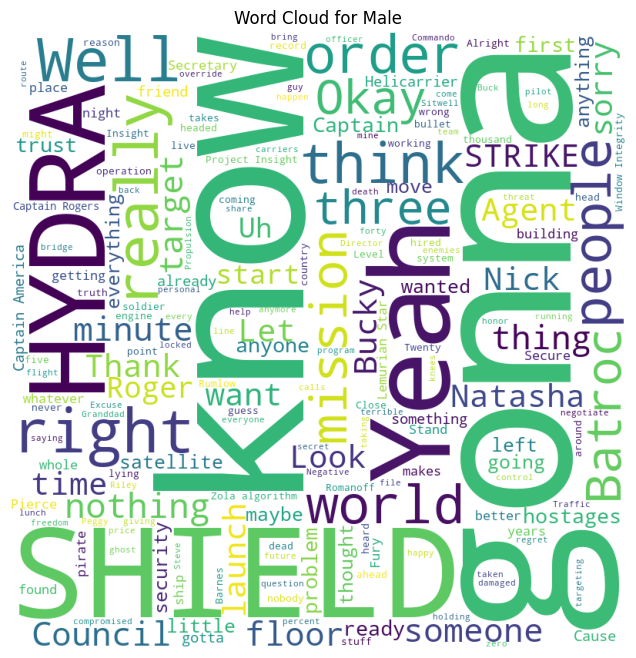

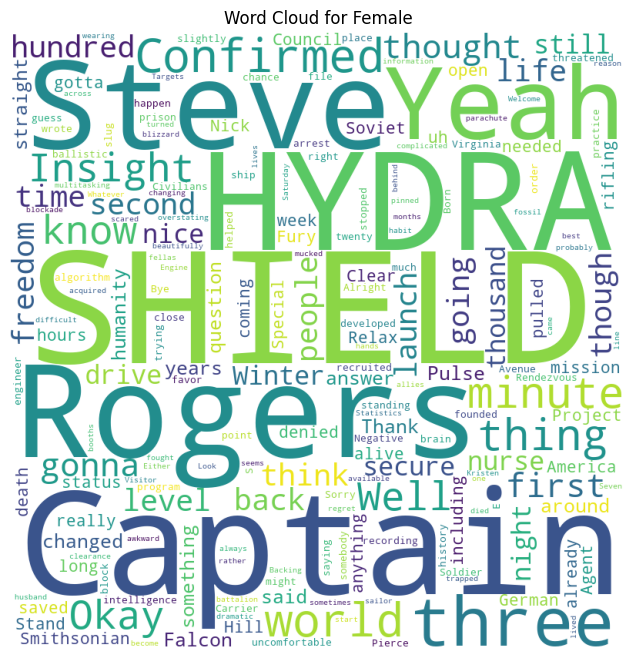

In [13]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# DataFrame 'df' assumed to contain a 'line' column with text data and a 'gender' column
# Filter words to include only those with a length of exactly 5 characters
def get_five_character_words(text):
    words = text.split()
    return ' '.join([word for word in words if len(word) >= 5])

# Create a new text string for each gender containing only 5-character words
male_text = ' '.join([row['line'] for index, row in df.iterrows() if row['gender'] == 'MALE'])
female_text = ' '.join([row['line'] for index, row in df.iterrows() if row['gender'] == 'FEMALE'])

male_text = get_five_character_words(male_text)  # Filter for 5-character words
female_text = get_five_character_words(female_text)  # Filter for 5-character words

# Generate the word clouds for each gender
male_wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate(male_text)
female_wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate(female_text)

# Display the word clouds
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(male_wordcloud)
plt.axis("off")
plt.title("Word Cloud for Male")
plt.show()

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(female_wordcloud)
plt.axis("off")
plt.title("Word Cloud for Female")
plt.show()


#### Movies with number of male and female characters and number of dialogues


In [14]:
import os
import pandas as pd

In [15]:
movies = []
male_count = []
female_count = []
total_male_chars = []
total_female_chars = []
folder_path = 'script_csv'
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        movies.append(filename.split(".")[0])
        movie_name = filename.split(".")[0]
        df = pd.read_csv(os.path.join(folder_path, filename))
        if 'gender' in df.columns and 'character' in df.columns:
            # Get unique male and female character names
            unique_male_chars = df[df['gender'] == 'MALE']['character'].unique()
            unique_female_chars = df[df['gender'] == 'FEMALE']['character'].unique()
                        # Count the number of unique male and female characters
            for i in unique_female_chars:
                total_female_chars.append(i)
            for i in unique_male_chars:
                total_male_chars.append(i)
            num_male_chars = len(unique_male_chars)
            num_female_chars = len(unique_female_chars)
            male_count.append(num_male_chars)
            female_count.append(num_female_chars)
            # print(f"Movie: {movie_name}")
            # print(f"Number of unique male characters: {num_male_chars}")
            # print(f"Number of unique female characters: {num_female_chars}")
print("movie name","number of male characters","number of female characters")
for i in range(len(movies)):
    print(movies[i],male_count[i],female_count[i])
print(total_female_chars)
print(len(set(total_male_chars)),len(set(total_female_chars)))

movie name number of male characters number of female characters
age_of_ultron 26 12
ant_man 28 6
avengers 39 13
avengers_endgame 39 13
black_panther 27 16
captain_america 49 18
civil_war 33 9
infinity_war 38 9
iron_man 29 8
iron_man_2 26 10
iron_man_3 28 18
ragnarok 21 9
thor 29 5
thor_dark_world 28 10
winter_soldier 44 18
['NATASHA ROMANOFF', 'MARIA HILL', 'DR. HELEN CHO', 'WANDA MAXIMOFF', 'BALLET INSTRUCTOR', 'MADAME B', 'PEGGY CARTER', 'LAURA BARTON', "BARTON'S DAUGHTER", 'LILA BARTON', 'FRIDAY', 'ZRINKA', 'PEGGY CARTER', 'PEACHY', 'HOPE VAN DYNE', 'CASSIE LANG', 'MAGGIE LANG', 'NATASHA ROMANOFF', 'MARIA HILL', 'NASA SCIENTIST', 'GEORGI LUCHKOV', 'NATASHA ROMANOFF', 'CALCUTTA WOMAN', 'YOUNG GIRL', 'COUNCILWOMAN', 'PEGGY CARTER', 'PEPPER POTTS', 'FEMALE CARRIER BRIDGE TECH', 'FEMALE CITIZEN', 'WIFE', 'WAITRESS', 'MARIA HILL', 'NASA SCIENTIST', 'GEORGI LUCHKOV', 'NATASHA ROMANOFF', 'CALCUTTA WOMAN', 'YOUNG GIRL', 'COUNCILWOMAN', 'PEGGY CARTER', 'PEPPER POTTS', 'FEMALE CARRIER BRIDGE

In [16]:
char_Wise_Dialogue_count = {}
for movie in movies:
    df = pd.read_csv(os.path.join(folder_path, movie + '.csv'))
    for index, row in df.iterrows():
        if row['character'] in char_Wise_Dialogue_count:
            
            char_Wise_Dialogue_count[row['character']] += len(row['line'].split(' '))
        else:
            char_Wise_Dialogue_count[row['character']] = len(row['line'].split(' '))
print(len(char_Wise_Dialogue_count))

470


TONY STARK: 21355
THOR: 9235
STEVE ROGERS: 8470
LOKI: 5091
NATASHA ROMANOFF: 4919
NICK FURY: 4585
BRUCE BANNER: 3827
PEPPER POTTS: 3572
JAMES RHODES: 3002
SCOTT LANG: 2461


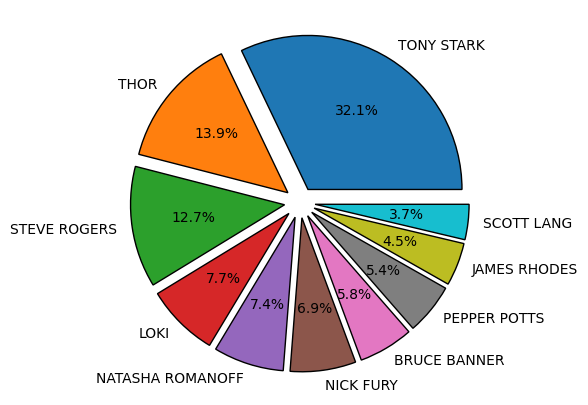

In [17]:
import matplotlib.pyplot as plt
# sort the dictionary by value
sorted_char_Wise_Dialogue_count = dict(sorted(char_Wise_Dialogue_count.items(), key=lambda item: item[1],reverse=True))
# print the top 10 characters with the most dialogue
for i, (k, v) in enumerate(sorted_char_Wise_Dialogue_count.items()):
    if i == 10:
        break
    print(f"{k}: {v}")

# plot a pie chart of the top 10 characters with the most dialogue
plt.figure(figsize=(10, 5))
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie([v for k, v in sorted_char_Wise_Dialogue_count.items()][:10], labels=[k for k, v in sorted_char_Wise_Dialogue_count.items()][:10], autopct='%1.1f%%',explode=explode,wedgeprops={'edgecolor': 'black'})
# plt.title('Top 10 Characters with the Most Dialogue across all movies')
plt.show()